In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation:

In [12]:
file_path = r"C:\Users\Raiyana Reyaz\OneDrive\Desktop\data science assignments\Decision Tree\Book1.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)


In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


## EDA

In [14]:
df.shape

(908, 13)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [16]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [18]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')>

In [20]:
# Check missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

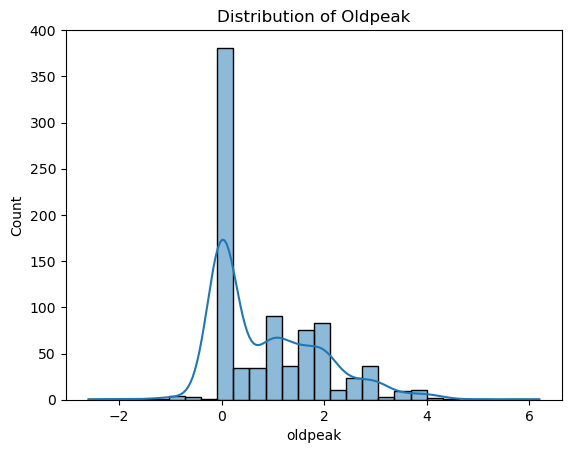

'The ‘oldpeak’ column has 62 missing values out of total records. \nThis should be handled later during data preprocessing, possibly by imputing with median since the distribution is skewed'

In [22]:
# missing values found in oldpeak
sns.histplot(df['oldpeak'], kde=True)
plt.title("Distribution of Oldpeak")
plt.show()

'''The ‘oldpeak’ column has 62 missing values out of total records. 
This should be handled later during data preprocessing, possibly by imputing with median since the distribution is skewed'''

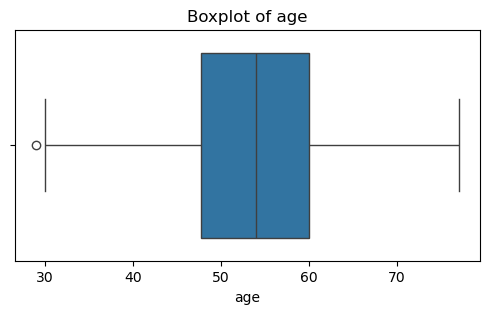

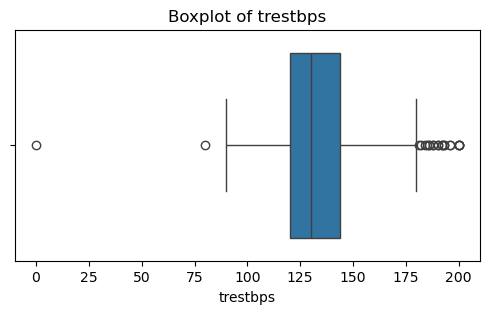

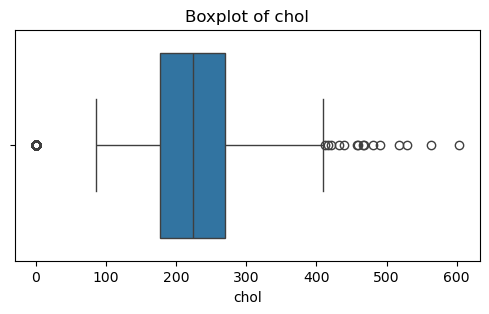

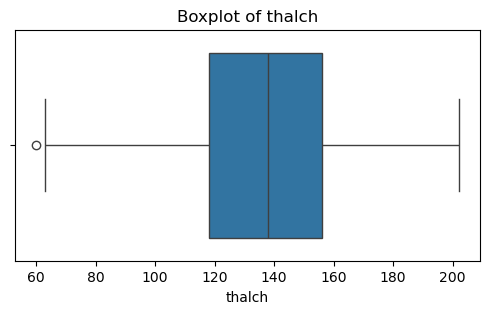

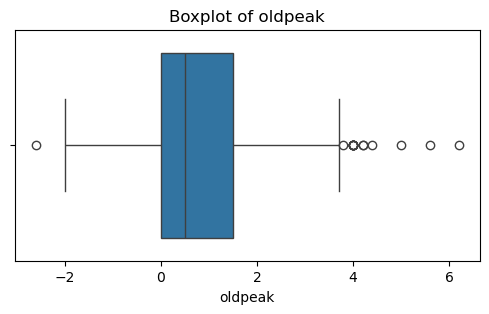

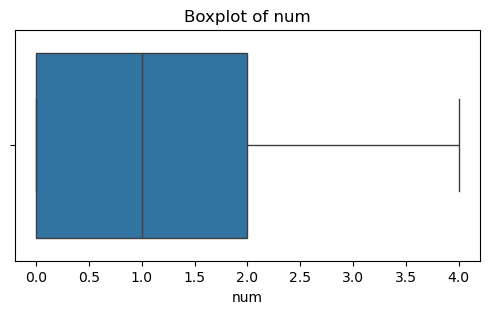

In [27]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

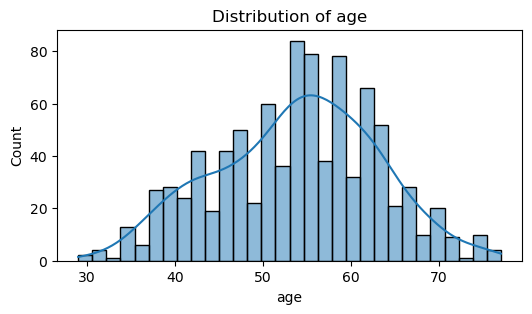

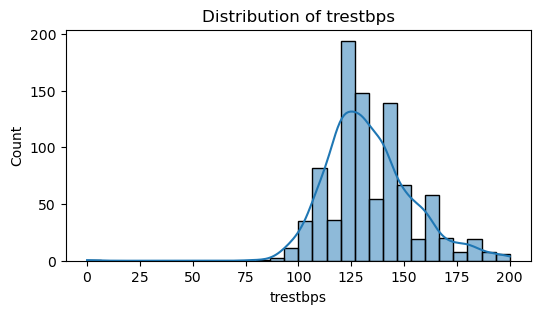

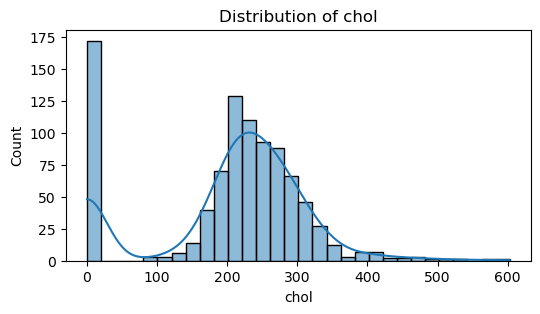

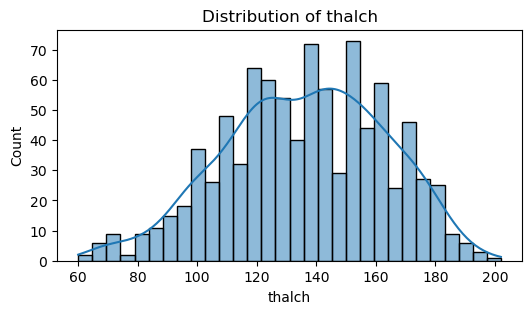

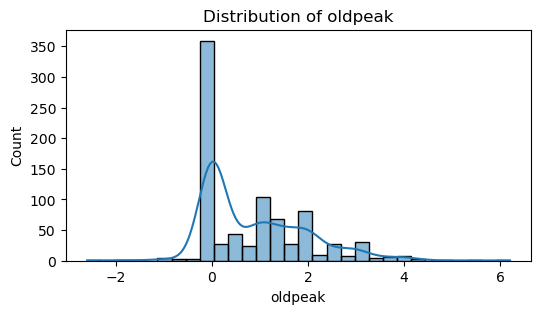

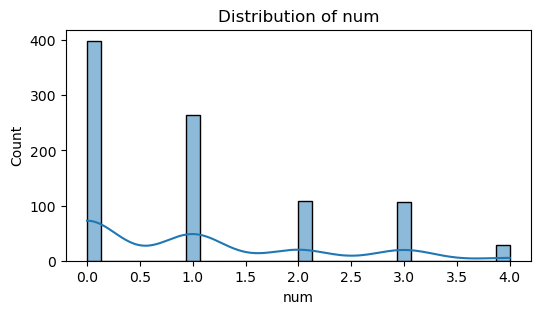

In [28]:
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

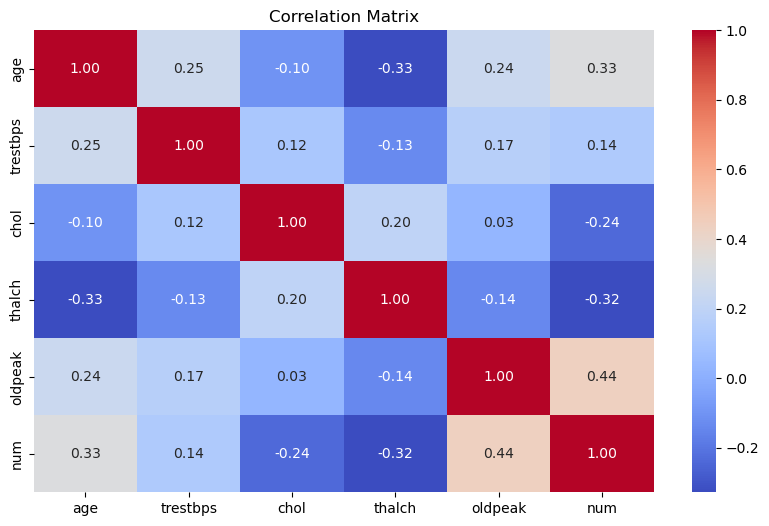

' The correlation matrix indicates that all numerical features have correlation coefficients between –0.33 and +0.33. \nThis suggests weak linear relationships among features, \nimplying minimal multicollinearity and that each feature may contribute independently to the prediction.'

In [34]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

''' The correlation matrix indicates that all numerical features have correlation coefficients between –0.33 and +0.33. 
This suggests weak linear relationships among features, 
implying minimal multicollinearity and that each feature may contribute independently to the prediction.'''

In [35]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in sex:
['Male' 'Female']

Unique values in cp:
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Unique values in restecg:
['lv hypertrophy' 'normal' 'st-t abnormality']

Unique values in exang:
[False True 'FALSE' 'TURE']

Unique values in slope:
['downsloping' 'flat' 'upsloping']

Unique values in thal:
['fixed defect' 'normal' 'reversable defect']


## 3. Feature Engineering:

In [36]:
# handle missing values
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_19304\4171898574.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


In [ ]:
categorical_cols = ['sex', 'cp', 'fbs', 'exang', 'slope', 'thal',' restecg']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

In [40]:
df = df.astype(int)

In [41]:
df.head()

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality
0,63,145,233,150,2,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,41,135,203,132,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,57,140,192,148,0,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
3,52,118,186,190,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
4,57,110,201,126,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

## 4. Decision Tree Classification:

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix,roc_curve

In [53]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [54]:
X = df.drop('num', axis=1)  
Y = df['num']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42)



In [58]:
dt_model.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=42)

In [59]:
y_pred_train = dt_model.predict(X_train)
y_pred_test = dt_model.predict(X_test)


print("Training Accuracy:", round(accuracy_score(Y_train, y_pred_train), 3))
print("Testing Accuracy:", round(accuracy_score(Y_test, y_pred_test), 3))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_test))


Training Accuracy: 1.0
Testing Accuracy: 0.736

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       133
           1       0.51      0.47      0.49        49

    accuracy                           0.74       182
   macro avg       0.66      0.65      0.66       182
weighted avg       0.73      0.74      0.73       182



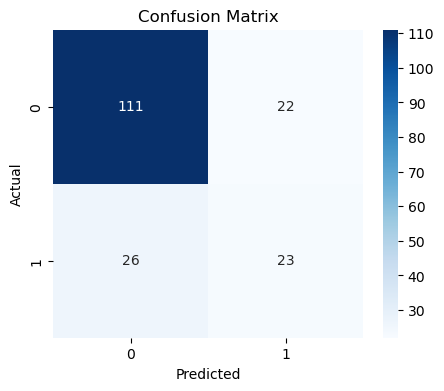

In [60]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [61]:
y_prob = dt_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC Score:", round(roc_auc, 3))

ROC-AUC Score: 0.652


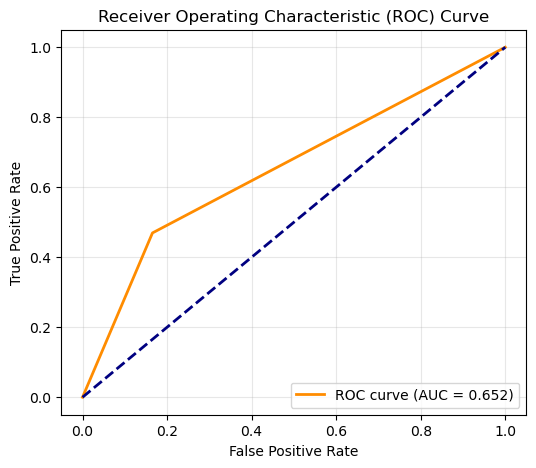

In [63]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = roc_auc_score(Y_test, y_prob)
# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

## 5. Hyperparameter Tuning:

In [64]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [65]:
# Define parameter grid
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [2, 3, 4, 5, 6, 8, 10, None],'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)


In [66]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [70]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", round(grid_search.best_score_, 3))


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.769


In [71]:
best_dt = grid_search.best_estimator_
y_pred_test = best_dt.predict(X_test)

In [69]:
print("Test Accuracy:", round(accuracy_score(Y_test, y_pred_test), 3))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_test))

Test Accuracy: 0.764

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       133
           1       0.62      0.33      0.43        49

    accuracy                           0.76       182
   macro avg       0.70      0.63      0.64       182
weighted avg       0.74      0.76      0.74       182



## 6. Model Evaluation and Analysis:

In [73]:
y_pred_train = best_dt.predict(X_train)
y_pred_test = best_dt.predict(X_test)
print("Training Accuracy:", round(accuracy_score(Y_train, y_pred_train), 3))
print("Testing Accuracy:", round(accuracy_score(Y_test, y_pred_test), 3))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_test))


Training Accuracy: 0.796
Testing Accuracy: 0.764

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       133
           1       0.62      0.33      0.43        49

    accuracy                           0.76       182
   macro avg       0.70      0.63      0.64       182
weighted avg       0.74      0.76      0.74       182



In [74]:
# ROC-AUC
y_prob = best_dt.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC-AUC Score:", round(roc_auc, 3))

ROC-AUC Score: 0.734


Interpretation:
Before tuning, the Decision Tree model achieved 100% training accuracy but only 73.6% testing accuracy, clearly indicating overfitting.

After performing hyperparameter tuning (adjusting max_depth, min_samples_split, and criterion), the model’s training accuracy dropped to 79.6%, but testing accuracy improved to 76.4%, showing much better generalization.

The ROC-AUC score increased from 0.652 → 0.734, which indicates moderately strong predictive performance.

Precision (0.79) and recall (0.92) for class 0 indicate the modelthe model performs better on “No Disease” cases, it still misses some “Disease” cases. This suggests some imbalance or insufficient sensitivity for positive cases.

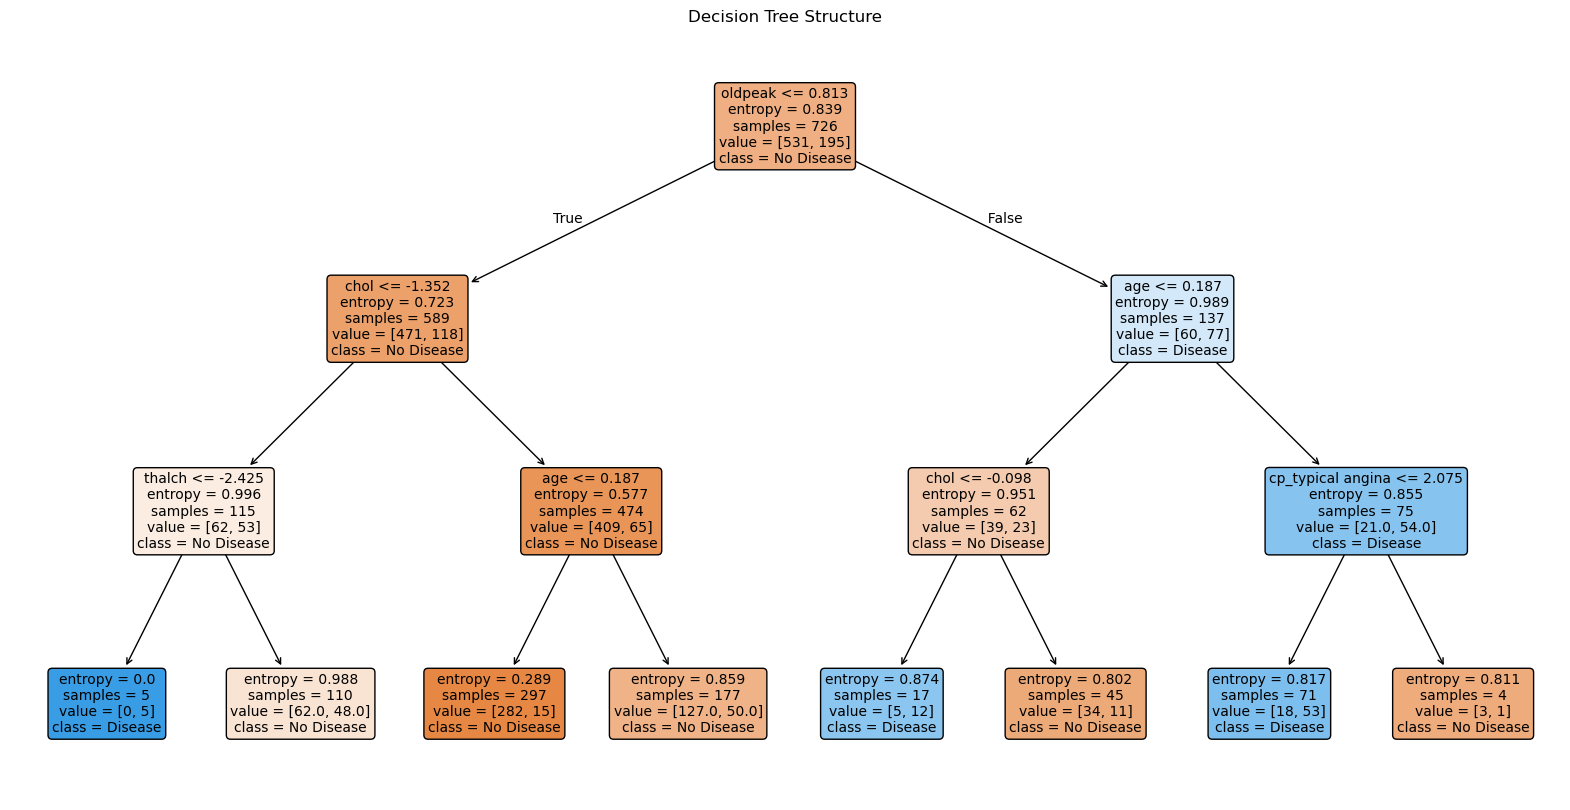

In [75]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(best_dt,feature_names=X.columns,class_names=['No Disease', 'Disease'],filled=True,rounded=True,fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_19304\4134800105.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


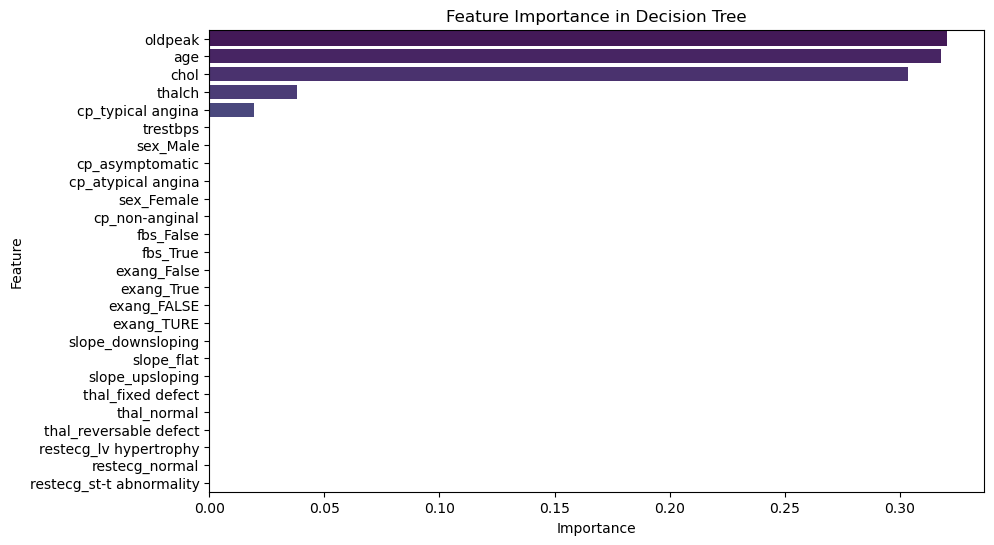

In [76]:
# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance in Decision Tree")
plt.show()

## Interview Questions:

### 1) Common Hyperparameters of Decision Tree Models (and Their Effects)

1)criterion: Common values:
'gini' → Gini Impurity (default)
'entropy' → Information Gain
Both work similarly; sometimes entropy gives slightly better splits but can be slower.

2) max_depth:
Effect:
Higher value → deeper tree → captures more details → can overfit.
Lower value → shallower tree → may underfit (too simple).

3)min_samples_split:Minimum number of samples required to split a node.
Effect:
Small value (e.g., 2) → more splits → more complex tree → overfitting.
Large value (e.g., 10 or 20) → fewer splits → simpler tree → less overfitting.


### 2) Difference Between Label Encoding and One-Hot Encoding

1) Label Encoding:
- Assigns a unique integer value to each category
- Number of new columns: Only 1 column
- When to use: When categories have a natural order (e.g., “Low < Medium < High”)
- Disadvantage: Adds a false sense of order between categories (model may think 2 > 1 > 0)
  
2) One-Hot Encoding:
- Creates binary columns (0/1) for each category
-  Number of new columns:One new column per category
-  When to use:When categories have no order (e.g., “Male”, “Female”, “Others”)
- Disadvantage: Increases dataset dimensionality, especially for many categories
